# Galactic Dynamo

This project is a part of the term project given in course P464 Plamsa Physics and Magnetohydrodynamics taught in Spring 2024 at NISER Bhubaneswar.

Submitted by: Chandan Kumar Sahu, Integrated MSc. SPS batch 19

Supervised by: Dr. Luke R. Chamandy, SPS, NISER



### Task - 1
### Galactic Dynamo in the z-direction

We have the mean-field induction equation as 
$$ \dfrac{\partial \bar{B}}{\partial t} = \nabla \times \left[ \bar{V} \times \bar{B} + \mathcal{E} - \eta \left( \nabla \times \bar{B} \right) \right] $$
where $\mathcal{E} = \left( \alpha \bar{B} \right) - \eta_t \left( \nabla \times \bar{B} \right)$

We will solve the equations in the cylindrical coordinates (r, $\phi$, z) with the origin at the galactic centre and the z-axis parallel to the galactic angular velocity. However, to simplify things, lets make some approximations.

1. Omit the terms involving $\bar{V} \times \bar{B}$ and $\alpha$. We will land up on just the diffusion equation.
$$ \dfrac{\partial \bar{B}}{\partial t} = - \nabla \times \left[ \eta_T \left( \nabla \times \bar{B} \right) \right] $$
where $\eta_T = \eta + \eta_t$

2. Take $\eta_T$ independent of $B$. Our equation becomes
$$ \dfrac{\partial \bar{B}}{\partial t} = - \eta_T \left[ \nabla \times \left( \nabla \times \bar{B} \right) \right] $$
But $\nabla \times \left( \nabla \times \bar{B} \right) = \nabla \left( \nabla \cdot \bar{B} \right) - \nabla^2 \bar{B} $ and $\nabla \cdot \bar{B} = 0$ (Gauss's Law), so we finally have
$$ \boxed{ \dfrac{\partial \bar{B}}{\partial t} = \eta_T \nabla^2 \bar{B} }$$

This is the Fickian diffusion equation. We will solve this equation numerically.


In cylindrical coordinates, the laplacian operator becomes

$$ \nabla^2 = \frac{1}{r} \frac{\partial}{\partial r}\left(r \frac{\partial}{\partial r}\right) + \frac{1}{r^2} \frac{\partial^2}{\partial \phi^2} + \frac{\partial^2}{\partial z^2} $$

So we get the final equations as
$$ \begin{aligned}
    \frac{\partial \bar{B}_r}{\partial t} &= \eta_T \frac{1}{r} \frac{\partial}{\partial r}\left(r \frac{\partial \bar{B_r}}{\partial r}\right) \\
    \frac{\partial \bar{B}_\phi}{\partial t} &= \eta_T \frac{1}{r^2} \frac{\partial^2 \bar{B}_\phi}{\partial \phi^2} \\
    \frac{\partial \bar{B}_z}{\partial t} &= \eta_T \frac{\partial^2 \bar{B}_z}{\partial z^2}
\end{aligned} $$

Since the problem statement in the projevt aims to solve only in the z-direction, we remove all radial or azimuthal variations of the magnetic field $\left(\dfrac{\partial }{\partial r} = \dfrac{\partial }{\partial \phi} = 0 \right)$. 

We are now left with one single equation to solve, i.e., the Fickian diffusion equation in $B_z$.
$$ \boxed{ \frac{\partial \bar{B}_z}{\partial t} = \eta_T \frac{\partial^2 \bar{B}_z}{\partial z^2} } $$



In [1]:
# Importing required libraries
import matplotlib.pyplot as plt
import numpy as np


Let's first define the function to solve the heat diffusion equation using Crank-Nicolson method. 

This requires two function, first, which defines the governing matrix for the implicit method, then the Crank-Nicholson algorithm uses it to find the solution.


In [2]:
"""
Get the matrices A and B for solving the diffusion equation using Crank-Nicolson method.

Parameters:
- N: Number of spatial grid points
- sigma: alpha*dt/dx^2

Returns:
- A: Matrix A
- B: Matrix B
"""

def get_diff_matrix(N, sigma):
    A = [[0 for j in range(N)] for k in range(N)]
    B = [[0 for j in range(N)] for k in range(N)]

    for i in range(0, N):
        A[i][i] = 2 + 2*sigma
        B[i][i] = 2 - 2*sigma
        if i > 0:
            A[i][i-1] = -sigma
            B[i][i-1] = sigma
        if i < N-1:
            A[i][i+1] = -sigma
            B[i][i+1] = sigma

    return A, B


"""
Solve 1D diffusion equation using Crank-Nicolson method.

Parameters:
- x_max: Extent of the spatial domain
- t_max: Total simulation time
- dx: Spatial step size
- dt: Time step size
- Diff: Thermal diffusivity

Returns:
- u: Temperature distribution over space and time
- x: Spatial grid
- t: Time grid
"""

def crank_nicolson_diffusion(x_max, t_max, dx, dt, Diff, init_cond):

    alpha = Diff * dt / (dx**2)

    # Spatial grid
    x = [i*dx for i in range(int(x_max/dx)+1)]
    t = [j*dt for j in range(int(t_max/dt)+1)]

    # Initialize temperature array
    Temp = [[0 for j in range(int(t_max/dt)+1)] for i in range(len(x))]

    # Initial condition
    for i in range(len(x)):
        Temp[i][0] = init_cond(x[i])

    # Get the matrices for solving the matrix using crank-nicolson method
    A, B = get_diff_matrix(len(x), alpha)

    Temp = np.array(Temp)
    A = np.array(A)
    B = np.array(B)

    for j in range(1, int(t_max/dt)+1):
        Temp[:, j] = np.linalg.solve(A, np.dot(B, Temp[:, j - 1]))

    return Temp, np.array(x), np.array(t)

We now define the plotting function

In [3]:

"""
Plot the solution in both 1D and Heatmap format.

Parameters:
- time_grid: Time grid
- spatial_grid: Spatial grid
- solution: Solution of the diffusion equation

Returns:
- Makes the plots
"""

def plot_diff(time_grid, spatial_grid, solution):

    # Create 2D plots
    plt.figure(figsize=(6, 4))
    for i in (range(0, len(time_grid), int(len(time_grid)/5))):
        plt.plot(spatial_grid, solution[:, i], label=f'time = {time_grid[i]:.1f}')
    plt.xlabel('Thickness of the galaxy (kpc)')
    plt.ylabel(r'Magnetic Field Strength ($B_z$)')
    plt.title('Diffusion of Magnetic field in z direction')
    plt.ylim(np.min(solution)-10, np.max(solution)+10)
    plt.grid()
    plt.legend()

    # Create imshow plot
    plt.figure(figsize=(6, 4))
    plt.imshow(solution, extent=[0, time_grid[-1], 0, spatial_grid[-1]], aspect='auto', origin='lower', cmap='Spectral_r')
    plt.colorbar(label=r'Magnetic Field Strength ($B_z$)')
    plt.title('Diffusion of Magnetic field in z direction')
    plt.xlabel('Time')
    plt.ylabel('Thickness of the galaxy (kpc)')
    plt.grid()


We now define the initial condition and the necessary input parameters. The final solution is then calculated and plotted.

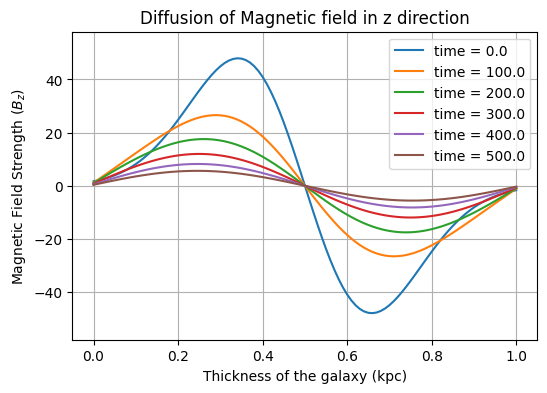

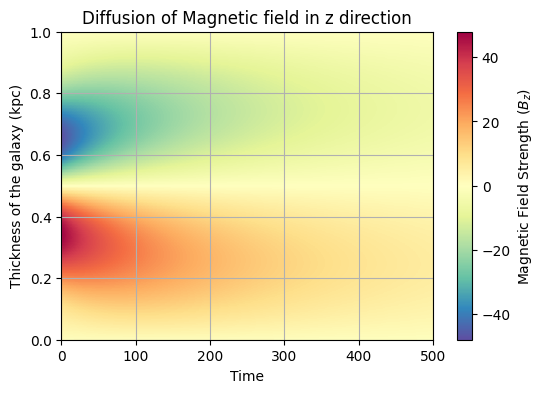

In [4]:
"""
Initial condition for the diffusion equation.

Parameters:
- x: Spatial grid

Returns:
- Initial condition
"""

def init_cond(x):
    return -500*(x-0.5)*np.exp(-20*(x-0.5)**2)

# Constants and parameters
eta_T = 1e-4    # magnetic diffusivity
t_max = 500     # total simulation time
z_max = 1.0     # thickness of the disc
dt = 0.05       # time step
dz = 0.01       # spatial step in z direction

solution, spatial_grid, time_grid = crank_nicolson_diffusion(z_max, t_max, dz, dt, eta_T, init_cond)

# Plot the diffusion equation solution
plot_diff(time_grid, spatial_grid, solution)

plt.show()